In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from pandas.plotting import table
import math

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

df = pd.read_csv('../data/default-of-credit-card-clients.csv')
df = df.rename(columns={"PAY_0": "PAY_1"}, errors="raise")

### General Overview

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.info()

# > all numerical attributes
# > no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
#  Gender (1 = male; 2 = female).
#  Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#  Marital status (1 = married; 2 = single; 3 = others). 
#  default payment next month 	(1 = yes; 0 = no)

no_categorical = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

desc = df[no_categorical].describe().round(2)

desc

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,35.49,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50
std,129747.66,9.22,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47
min,10000.00,21.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,28.00,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75
50%,140000.00,34.00,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
75%,240000.00,41.00,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00
max,1000000.00,79.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00


## EDA
### Target

In [11]:
from collections import Counter

counter = Counter(df['default payment next month'])
print(counter)

print(f"Percentage of 0 : {counter[0]/len(df)}")
print(f"Percentage of 1 : {counter[1]/len(df)}")

Counter({0: 23364, 1: 6636})
Percentage of 0 : 0.7788
Percentage of 1 : 0.2212


In [12]:
from collections import Counter

counter = Counter(df['EDUCATION'])
print(counter)

print(f"Percentage of 0 : {counter[0]/len(df)}")
print(f"Percentage of 1 : {counter[1]/len(df)}")

Counter({2: 14030, 1: 10585, 3: 4917, 5: 280, 4: 123, 6: 51, 0: 14})
Percentage of 0 : 0.00046666666666666666
Percentage of 1 : 0.35283333333333333


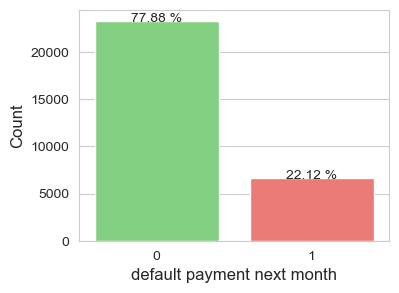

In [13]:
plt.figure(figsize=(4,3))
graph_target = sns.countplot(x="default payment next month", data=df, palette=['#77DD76','#FF6962'])

i=0
for p in graph_target.patches:
    height = p.get_height()
    
    percentage = round(100 * df["default payment next month"].value_counts()[i] / len(df),2)
    
    str_plot = f'{percentage} %'
    
    graph_target.text(p.get_x()+p.get_width()/2., height - 100, str_plot, ha="center")
    i += 1

# plt.savefig('../images/02-count_plot.svg')
plt.xlabel('default payment next month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Categorical features

In [18]:
def plot_categorical_distribution(df,feature,order,ticks,rotation,ax):
    
    graph = sns.countplot(x=feature, data=df, order=order, ax=ax, hue="default payment next month", palette=['#77DD76','#FF6962'])    
    
    for p in ax.patches:
        if not math.isnan(p.get_height()):
            height = int(p.get_height())
        else:
            height = 0
            
        ax.annotate(height, (p.get_x()-0.025, p.get_height()+500))
        
    graph.set(xticklabels=ticks)
    ax.tick_params(axis='x', rotation=rotation)
    ax.set_xlabel(feature,fontsize=15)
    ax.legend(['No Default','Default'])

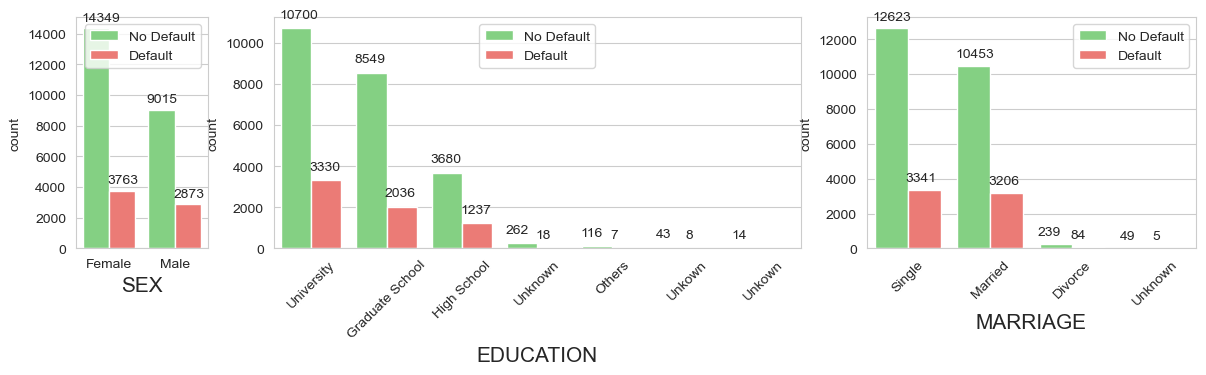

In [19]:
order_marriage = df["MARRIAGE"].value_counts().index
ticks_marriage = ['Single','Married','Divorce','Unknown']

order_education = df["EDUCATION"].value_counts().index
ticks_education = ["University","Graduate School","High School", "Unknown", "Others", "Unkown","Unkown"]

order_sex = df["SEX"].value_counts().index
ticks_sex = ["Female","Male"]

fig = plt.figure(constrained_layout=False,figsize=(14,3))
gs1 = fig.add_gridspec(nrows=1, ncols=6, left=0.1, right=0.90, wspace=0.5)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1:4])
ax3 = fig.add_subplot(gs1[0, 4:6])

plot_categorical_distribution(df,"SEX",order_sex,ticks_sex,0,ax1)
plot_categorical_distribution(df,"EDUCATION",order_education,ticks_education,45,ax2)
plot_categorical_distribution(df,"MARRIAGE",order_marriage,ticks_marriage,45,ax3)

# plt.savefig('../images/03-categorical-1.svg')

plt.show();

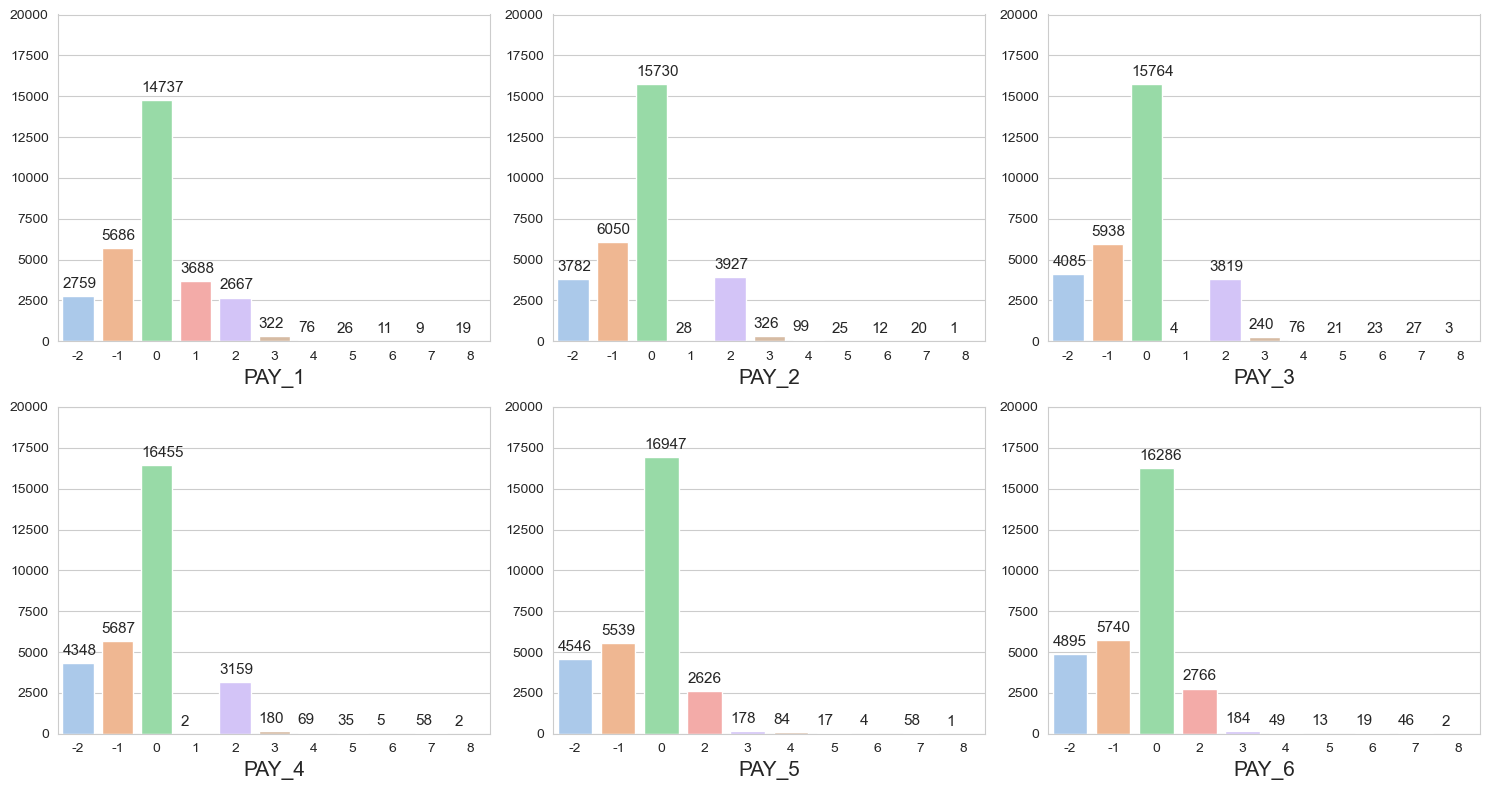

In [14]:
pays_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,8))

for i,col in enumerate(pays_cols):    
    plt.subplot(2,3,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'pastel')
    plt.ylim(0,20000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x(), p.get_height()+500), fontsize = 11)

plt.savefig('../images/04-categorical-2.svg')
plt.show()

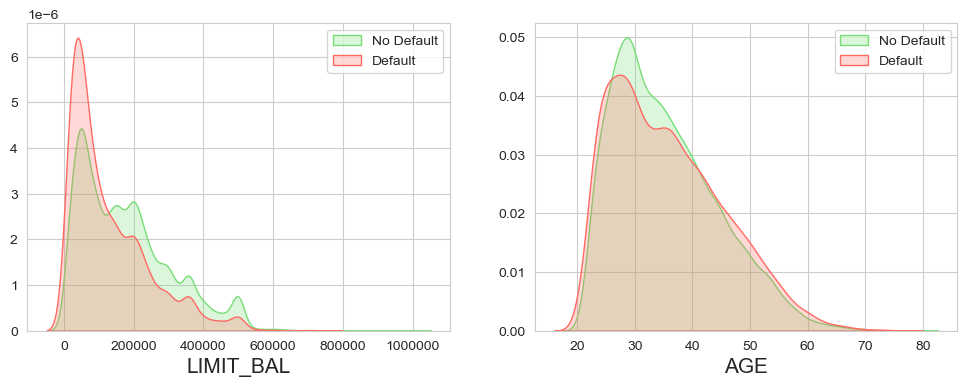

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.kdeplot(df.loc[(df['default payment next month'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True, color="#77DD76")
sns.kdeplot(df.loc[(df['default payment next month'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True, color="#FF6962")
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.xlabel('LIMIT_BAL', fontsize=15)
plt.ylabel('')
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(df.loc[(df['default payment next month'] == 0), 'AGE'], label = 'No Default', shade = True, color="#77DD76")
sns.kdeplot(df.loc[(df['default payment next month'] == 1), 'AGE'], label = 'Default', shade = True, color="#FF6962")
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.xlabel('AGE', fontsize=15)
plt.ylabel('')
plt.legend()

plt.savefig('../images/05-continuous-1.svg')
plt.show();

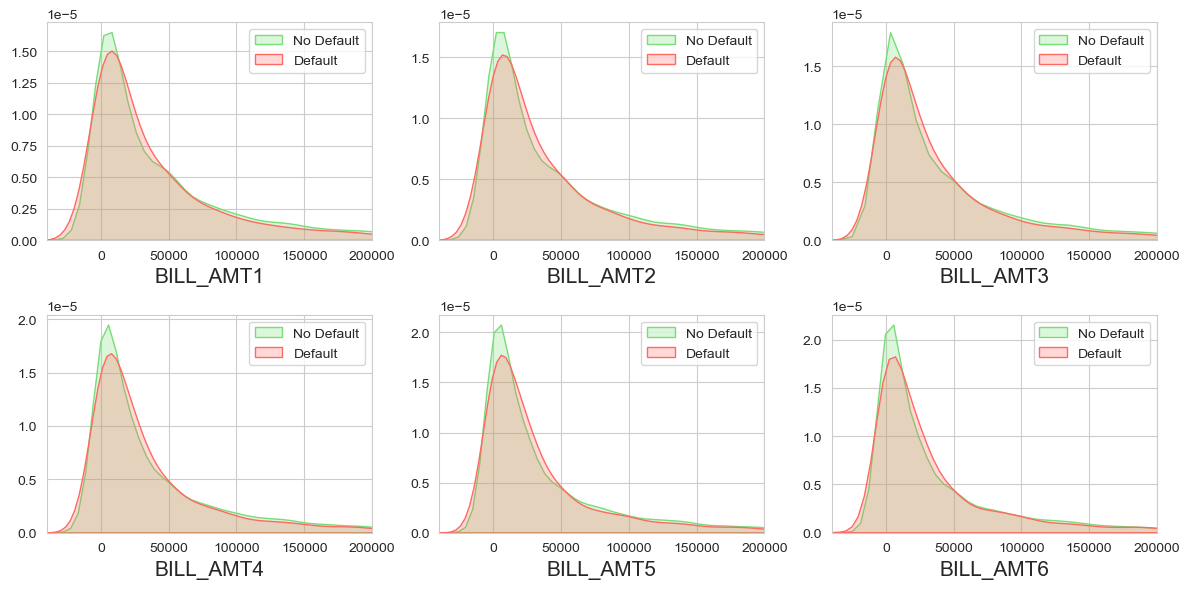

In [18]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['default payment next month'] == 0), col], label = 'No Default',color="#77DD76", shade=True)
    sns.kdeplot(df.loc[(df['default payment next month'] == 1), col], label = 'Default', color="#FF6962", shade=True)
    plt.xlim(-40000,200000)
    plt.ylabel('')
    plt.xlabel(col,fontsize=15)
    plt.legend()
    plt.tight_layout()

plt.savefig('../images/06-continuous-2.svg')
plt.show()

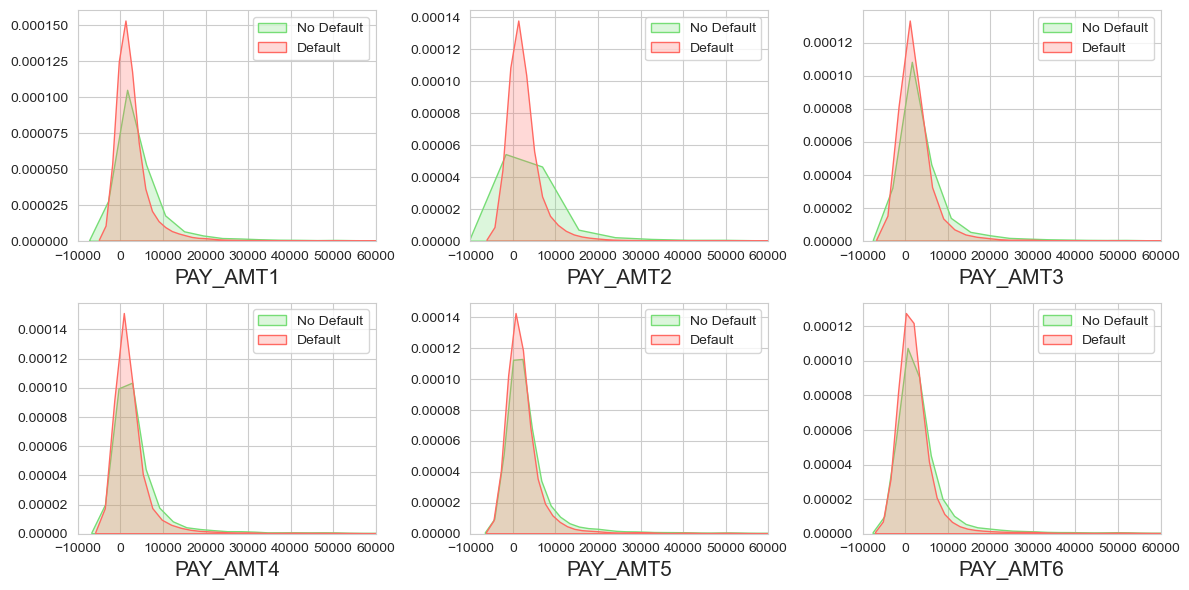

In [43]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['default payment next month'] == 0), col], label = 'No Default', shade = True,color="#77DD76")
    sns.kdeplot(df.loc[(df['default payment next month'] == 1), col], label = 'Default', shade = True, color="#FF6962")
    plt.xlim(-10000,60000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
    
plt.savefig('../images/07-continuous-3.svg')
plt.show()

## Correlation

In [17]:
df.drop(columns=['ID'], inplace=True)

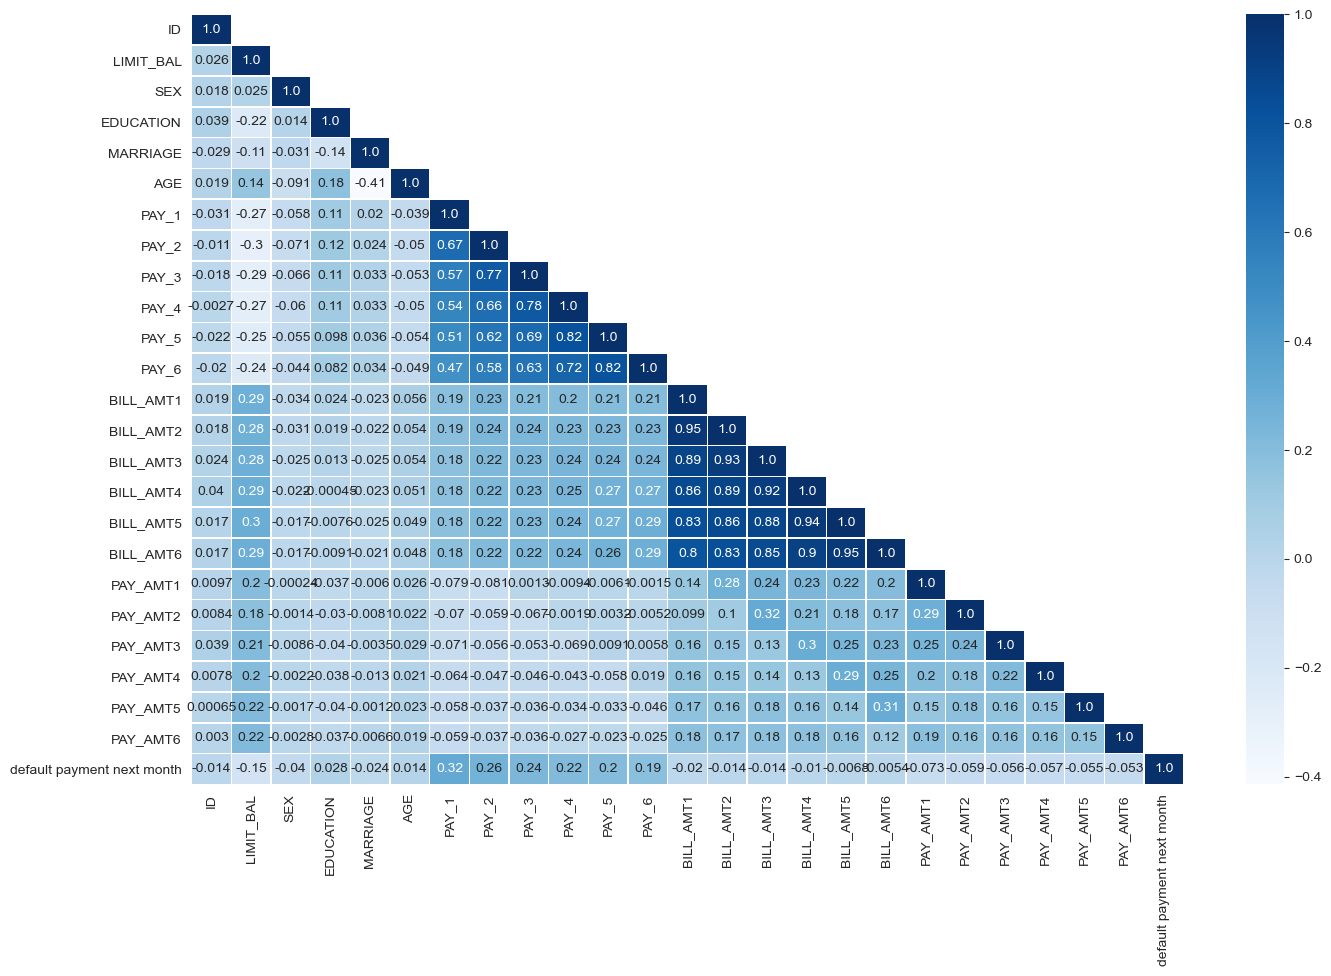

In [5]:
cm = df.corr(method='pearson')

mask = np.array(cm)
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize=(16,10), dpi=100)
sns.heatmap(cm, annot=True, fmt='.2', linewidths=.3, mask=mask, cmap="Blues")
plt.savefig('../images/08-heatmap.svg')
plt.show()